# Preprocessing

# Feature Extraction

# Model Development

# Data Cleaning

### Reading the Data

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# df = pd.read_csv('Data/male_players_23.csv')
df = pd.read_csv('Data/male_players (legacy)_23.csv')
print(len(df))

158581


In [2]:
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161583 entries, 0 to 161582
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 135.6+ MB


### Handling Nulls

In [4]:
# sns.heatmap(df.isnull(), cbar = False)
# Data has lots of missing values

In [5]:
# Total number of nulls = 1218702
df.isnull().sum().sum()

1218702

In [6]:
# Nulls in each column
nulls = df.isnull().sum() 
print(nulls[nulls > 0])

value_eur                           2053
wage_eur                            1761
league_id                           1773
league_name                         1773
league_level                        2717
club_team_id                        1773
club_name                           1773
club_position                       1773
club_jersey_number                  1773
club_loaned_from                  152045
club_joined_date                   11311
club_contract_valid_until_year      1773
nation_team_id                    152267
nation_position                   152267
nation_jersey_number              152267
release_clause_eur                 57961
player_tags                       148920
player_traits                      88433
pace                               17969
shooting                           17969
passing                            17969
dribbling                          17969
defending                          17969
physic                             17969
mentality_compos

In [7]:
# Showing it as percentages
print(nulls[nulls > 0] / len(df) * 100)

value_eur                          1.270554
wage_eur                           1.089842
league_id                          1.097269
league_name                        1.097269
league_level                       1.681489
club_team_id                       1.097269
club_name                          1.097269
club_position                      1.097269
club_jersey_number                 1.097269
club_loaned_from                  94.097151
club_joined_date                   7.000118
club_contract_valid_until_year     1.097269
nation_team_id                    94.234542
nation_position                   94.234542
nation_jersey_number              94.234542
release_clause_eur                35.870729
player_tags                       92.163161
player_traits                     54.729148
pace                              11.120601
shooting                          11.120601
passing                           11.120601
dribbling                         11.120601
defending                       

In [8]:
# Check nulls in pace, shooting, passing, dribbling, defending, physic
# Check if they are the same rows
print("Number of nulls:", df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1).sum())
# All of them are null in the same rows. So we could drop them
# print(df[df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1)]['player_positions'].count())
print("Number of goal keepers:", len(df[df['player_positions'] == 'GK']))
# We notice all of them are goal keepers


Number of nulls: 17969
Number of goal keepers: 17969


In [9]:
# Handling a few nulls
'''
11.120601 +  88.879399 = 100
'pace' -----> 'goalkeeping_speed'
'shooting' -----> 'goalkeeping_kicking
'passing' -----> 20
'dribbling' -----> 22
'defending' -----> 14
'physic' -----> 64          # mean instead of min, as GK's aren't that bad
'''
# el goalkeepers lyhom scores msh lel la3eeba el tanya, fa hn-merge el 2 columns basically
df['pace'] = df[['pace', 'goalkeeping_speed']].max(axis = 1)
df['shooting'] = df[['shooting', 'goalkeeping_kicking']].max(axis = 1)

# fy 7agat tanya mne2darsh n3mlha merge, fa hna5od el min aw mean 3la asas en el GK msh byb2a gamed fl 7war dh
df['passing'].fillna(df['passing'].min(), inplace = True)
df['dribbling'].fillna(df['dribbling'].min(), inplace = True)
df['defending'].fillna(df['defending'].min(), inplace = True)
df['physic'].fillna(df['physic'].mean(), inplace = True)

In [10]:
# We can't do this before the previous cell, because we use some of the dropped columns to fill the nulls

# Drop columns with more than 33% missing values
# thresh: minimum number of non-NA values to keep the column
df = df.dropna(thresh = 2 * len(df) / 3, axis = 1)
nulls = df.isnull().sum() 
print(nulls[nulls > 0] / len(df) * 100)

value_eur                          1.270554
wage_eur                           1.089842
league_id                          1.097269
league_name                        1.097269
league_level                       1.681489
club_team_id                       1.097269
club_name                          1.097269
club_position                      1.097269
club_jersey_number                 1.097269
club_joined_date                   7.000118
club_contract_valid_until_year     1.097269
mentality_composure               20.336917
dtype: float64


In [11]:
# Check nulls in 'league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number'
# Check if they are the same rows, msh rows mo5tlfa
print("Number of all null rows:", df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().all(axis = 1).sum())
print("Number of any null rows:", df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().any(axis = 1).sum())
# tl3 3adad el rows el kolaha null = 3adad el nulls mn kol column fyhom, y3ny nafs el rows
# All of them are null in the same rows. So we could drop them without losing much data

# Calculate percentage of nulls in these columns
# print(df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().all(axis = 1).sum() / len(df) * 100)

# Drop these empty rows
df = df.dropna(subset = ['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number'])

Number of all null rows: 1773
Number of any null rows: 1773


In [12]:
# We notice league level has only a few nulls, so we can drop them
df = df.dropna(subset = ['league_level'])

In [13]:
# Check nulls in 'gk'
print(df['gk'].isnull().sum())
# Check if there is null in 'gk' and position == goalkeeper
print(df['player_positions'][df['gk'].isnull()].str.contains('GK').sum())
# Some of them are goalkeepers


0
0


In [14]:
# Set df['gk'] nulls to the average of  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'

df.loc[df['gk'].isnull(), 'gk'] = df[df['gk'].isnull()][['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']].mean(axis = 1)

In [15]:
# See a few rows where 'value_eur' is null
df[df['value_eur'].isnull()].head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
530,3622,/player/3622/ricardo-alberto-silv-de-carvalho/...,15,2,2014-09-18,Ricardo Carvalho,Ricardo Alberto Silveira de Carvalho,CB,77,77,...,69+1,69+1,64+1,69+1,76+1,76+1,76+1,69+1,16+1,https://cdn.sofifa.net/players/003/622/15_120.png
532,26992,/player/26992/sylvain-distin/150002,15,2,2014-09-18,S. Distin,Sylvain Distin,CB,77,77,...,71,71,67,72,77,77,77,72,11,https://cdn.sofifa.net/players/026/992/15_120.png
559,153260,/player/153260/vitorino-hilton-da-silva/150002,15,2,2014-09-18,Hilton,Vitorino Hilton da Silva,CB,77,77,...,73,73,70,73,77,77,77,73,14,https://cdn.sofifa.net/players/153/260/15_120.png
688,23461,/player/23461/walter-samuel/150002,15,2,2014-09-18,W. Samuel,Walter Adrián Samuel Luján,CB,76,76,...,67,67,60,66,76,76,76,66,11,https://cdn.sofifa.net/players/023/461/15_120.png
1163,10764,/player/10764/juan-francisco-garcia-garcia/150002,15,2,2014-09-18,Juanfran,Juan Francisco García García,"CB, LB",74,74,...,70,70,70,72,74,74,74,72,11,https://cdn.sofifa.net/players/010/764/15_120.png


In [16]:
# get the type of columns that have nulls
df.dtypes[nulls[nulls > 0].index]

value_eur                         float64
wage_eur                          float64
league_id                         float64
league_name                        object
league_level                      float64
club_team_id                      float64
club_name                          object
club_position                      object
club_jersey_number                float64
club_joined_date                   object
club_contract_valid_until_year    float64
mentality_composure               float64
dtype: object

In [17]:
df['value_eur'].describe()
# get player with max value
# df[df['value_eur'] == df['value_eur'].max()]
# get 5 players with max value
df.nlargest(5, 'value_eur')


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
123817,231747,/player/231747/kylian-mbappe/220002,22,2,2021-09-23,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png
143054,231747,/player/231747/kylian-mbappe/230002,23,2,2022-09-26,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png
104935,231747,/player/231747/kylian-mbappe/210002,21,2,2020-09-23,K. Mbappé,Kylian Mbappé Lottin,"ST, LW, RW",90,95,...,63+3,63+3,67+3,63+3,55+3,55+3,55+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/21_120.png
143078,239085,/player/239085/erling-haaland/230002,23,2,2022-09-26,E. Haaland,Erling Braut Haaland,ST,88,94,...,64+3,64+3,62+3,61+3,62+3,62+3,62+3,61+3,19+3,https://cdn.sofifa.net/players/239/085/23_120.png
123840,239085,/player/239085/erling-haaland/220002,22,2,2021-09-23,E. Haaland,Erling Braut Haaland,ST,88,93,...,63+3,63+3,62+3,60+3,60+3,60+3,60+3,60+3,19+3,https://cdn.sofifa.net/players/239/085/22_120.png


In [18]:
df['mentality_composure'].describe()
# get nulls in 'mentality_composure'
df['mentality_composure'].isnull().sum()

31931

In [19]:
from sklearn.impute import KNNImputer
# Filling the nulls with KNN imputer
# bye7seb KNN w yshoof a2rab nas w ya5od el avg bta3hom
imputer = KNNImputer(missing_values=np.nan, n_neighbors=3)
df['mentality_composure'] = imputer.fit_transform(df[['mentality_composure']])

# Target Encoding

In [20]:
# print column names of type object
df.select_dtypes(include = 'object').columns

Index(['player_url', 'fifa_update_date', 'short_name', 'long_name',
       'player_positions', 'dob', 'league_name', 'club_name', 'club_position',
       'club_joined_date', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type', 'real_face', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object')

In [21]:
# df['player_url']            # drop
# df['long_name']             # drop
# df['fifa_update_date']      # drop
# df['club_joined_date']      # drop
# df['real_face']             # drop
# df['player_face_url']       # drop
# df['dob']                   # drop

# drop the above attributes
df = df.drop(columns = ['player_url', 'long_name', 'fifa_update_date', 'club_joined_date', 'real_face', 'player_face_url','dob'])


In [22]:
# print(df['long_name'].str.split('+').str[0])
# print(df['gk'].isnull().sum())
# get id of some null gk
print(df[df['gk'].isnull()]['player_id'])


Series([], Name: player_id, dtype: int64)


In [23]:
# loop on all the position attrributes and evaluate the cell
positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

for col in positions:
    # if it has + or - in it, evaluate the expression
    df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) else x)




In [24]:
# drop null values in 'value_eur' as they are very few, or we can use them for testing
# df = df.dropna(subset = ['value_eur'])

In [25]:
# Get number of nulls
if df.isnull().sum().sum() == 0:
    print("No nulls left. EZZZZ")

In [26]:
# Checking for duplicates
df.duplicated().sum()
# No duplicates found

0

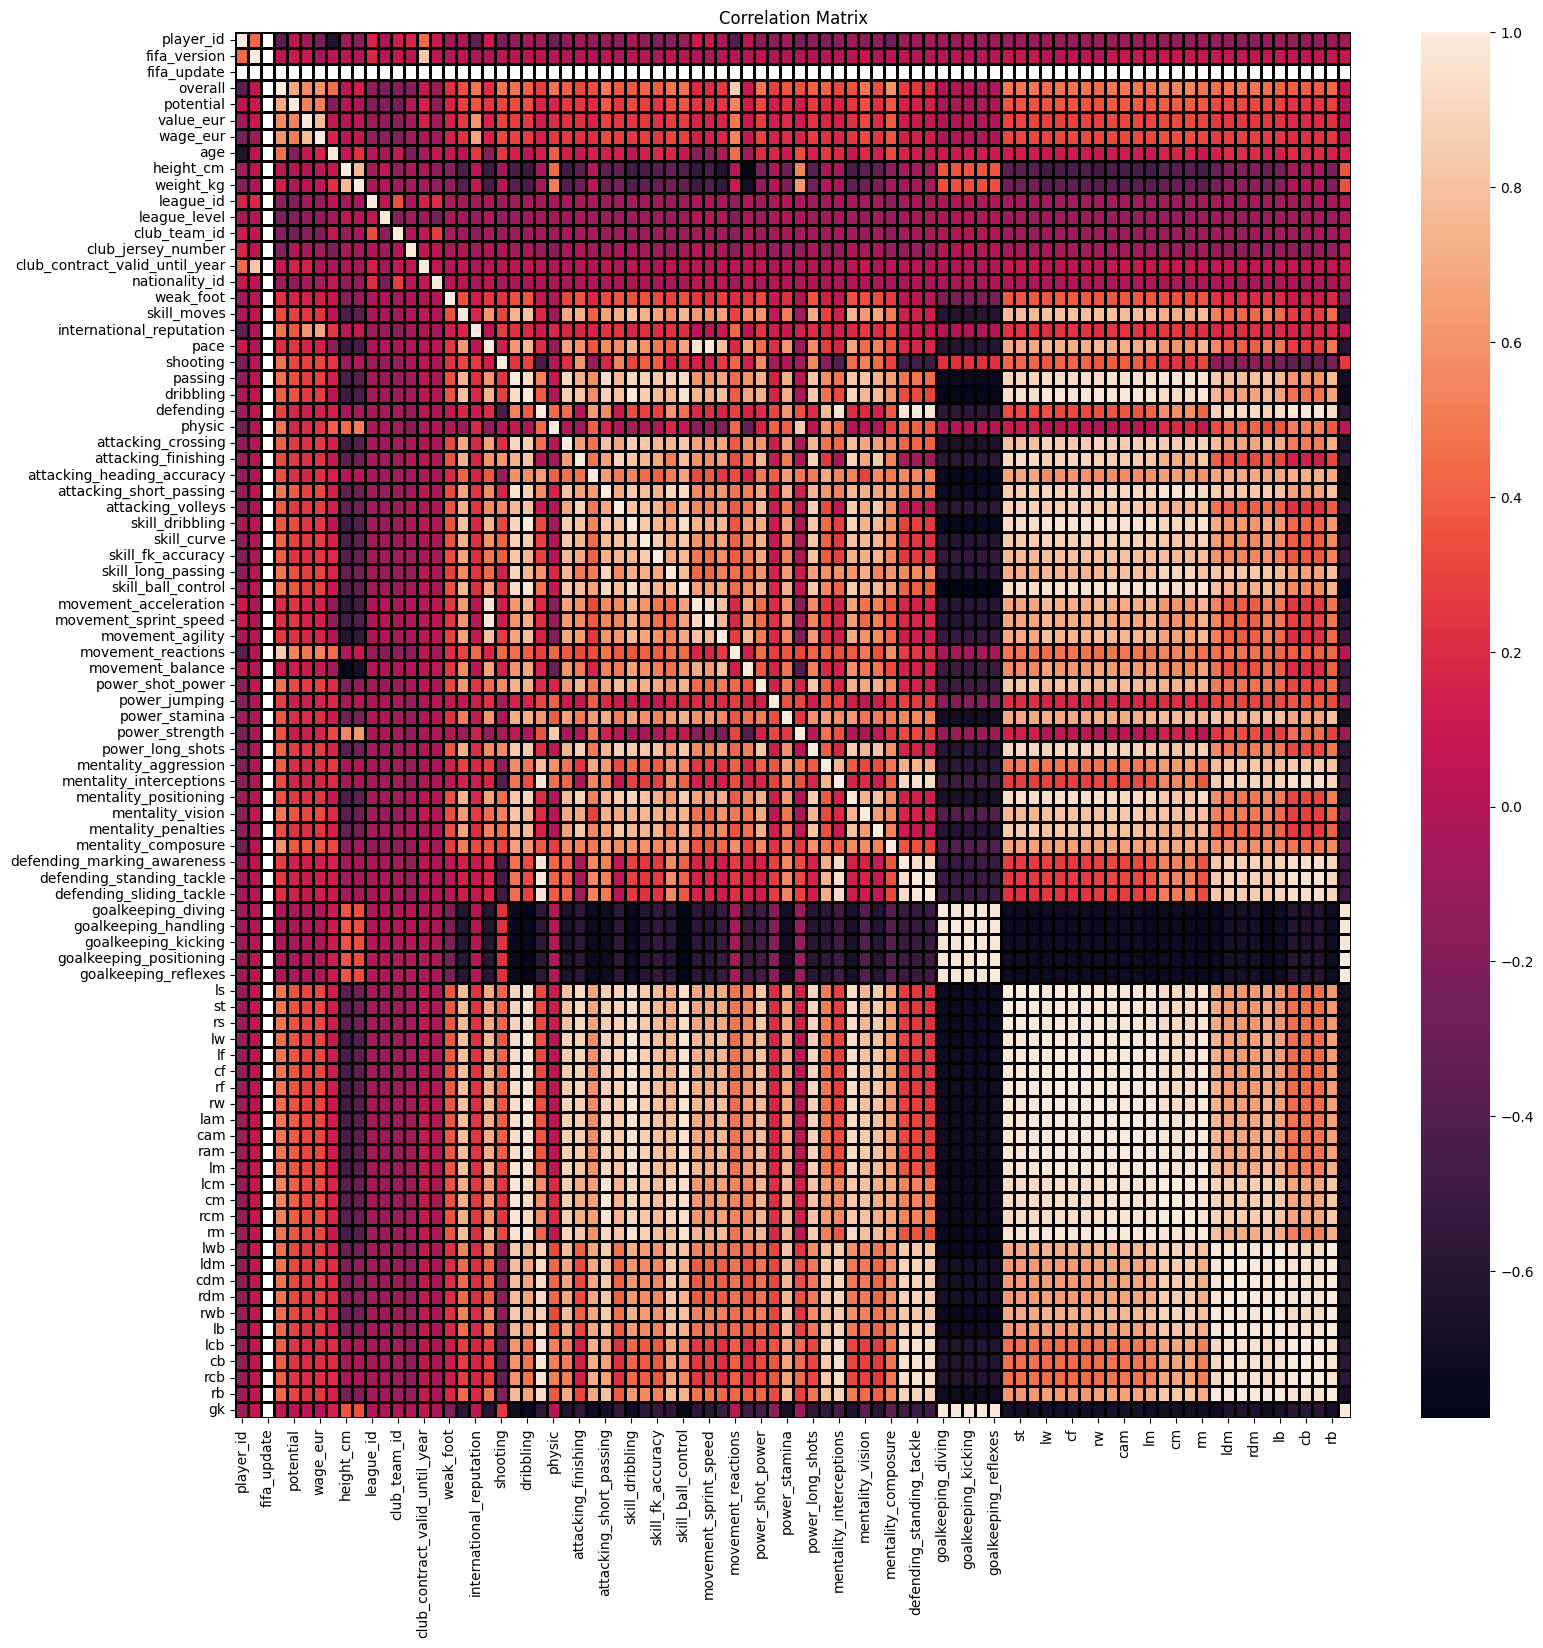

In [27]:
# making a heatmap of the correlation matrix
df2 = df.copy()
# dropping the categorical columns
df2 = df2.drop(columns = ['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type'])

plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(), cbar = True, linewidths=1, linecolor='black')
# sns.heatmap(df2.corr(), annot= False, cmap='jet')
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Both of these columns are not useful, as they are not related any other column
df = df.drop(columns = ['fifa_update', 'fifa_version'])

In [29]:
df2 = df.copy()
df2 = df2.drop(columns = ['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type'])

correlation_with_val_eur = np.abs(df2.corrwith(df2['value_eur']))            # absolute to handle -ve values
sorted_correlations = correlation_with_val_eur.sort_values(ascending=False)
# Take top correlations > 0.25
top_correlations = sorted_correlations[sorted_correlations > 0.25]
# print(top_15_correlations.index.tolist())
print(len(top_correlations))
print(top_correlations[:60])

38
value_eur                   1.000000
wage_eur                    0.779419
international_reputation    0.604807
overall                     0.566806
potential                   0.533896
movement_reactions          0.490547
mentality_composure         0.381837
cm                          0.326662
lcm                         0.326662
rcm                         0.326662
mentality_vision            0.320191
lam                         0.314159
ram                         0.314159
cam                         0.314159
lm                          0.302093
rm                          0.302093
ls                          0.302002
rs                          0.302002
st                          0.302002
rf                          0.300799
lf                          0.300799
cf                          0.300799
attacking_short_passing     0.295699
shooting                    0.294341
rw                          0.286438
lw                          0.286438
passing                     0.27690

In [30]:
df.select_dtypes(include = 'object').columns

Index(['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
       'body_type'],
      dtype='object')

In [31]:
df['work_rate'].value_counts()

work_rate
Medium/Medium    87335
High/Medium      27382
Medium/High      14277
High/High         7784
Medium/Low        7679
High/Low          6333
Low/Medium        3980
Low/High          3769
Low/Low            327
Name: count, dtype: int64

In [32]:
# We can split work rate into 2 columns: Attack and Defend
df['work_rate_attack'] = df['work_rate'].str.split('/').str[0]
df['work_rate_defend'] = df['work_rate'].str.split('/').str[1]

# Drop the original column
df = df.drop(columns = ['work_rate'])
# Get values of the new columns to make sure they are correct
print(df['work_rate_attack'].value_counts())
print(df['work_rate_defend'].value_counts())



work_rate_attack
Medium    109291
High       41499
Low         8076
Name: count, dtype: int64
work_rate_defend
Medium    118697
High       25830
Low        14339
Name: count, dtype: int64


In [33]:
# Now we can one hot encode these columns
df = pd.get_dummies(df, columns = ['work_rate_attack', 'work_rate_defend'])
# The types are bool, we can convert them to int
df['work_rate_attack_Low'] = df['work_rate_attack_Low'].astype(int)
df['work_rate_attack_Medium'] = df['work_rate_attack_Medium'].astype(int)
df['work_rate_attack_High'] = df['work_rate_attack_High'].astype(int)
df['work_rate_defend_Low'] = df['work_rate_defend_Low'].astype(int)
df['work_rate_defend_Medium'] = df['work_rate_defend_Medium'].astype(int)
df['work_rate_defend_High'] = df['work_rate_defend_High'].astype(int)




In [34]:
len(df.columns)

98

In [35]:
# ['short_name', 'player_positions', 'league_name', 'club_name',
    #    'club_position', 'nationality_name', 'preferred_foot', 'body_type']
print("Before:", df['body_type'].value_counts())
# No need to look at height here, as there is another column for it
df['body_type'] = df['body_type'].str.split().str[0]
print("\n\nAfter:", df['body_type'].value_counts())

Before: body_type
Normal (170-185)    55808
Lean (170-185)      34580
Normal (185+)       33175
Lean (185+)         16355
Normal (170-)        5504
Stocky (170-185)     5179
Lean (170-)          3718
Stocky (185+)        3203
Stocky (170-)         907
Unique                437
Name: count, dtype: int64


After: body_type
Normal    94487
Lean      54653
Stocky     9289
Unique      437
Name: count, dtype: int64


In [36]:
# One hot encode
df = pd.get_dummies(df, columns = ['body_type'])
df['body_type_Lean'] = df['body_type_Lean'].astype(int)
df['body_type_Normal'] = df['body_type_Normal'].astype(int)
df['body_type_Stocky'] = df['body_type_Stocky'].astype(int)
df['body_type_Unique'] = df['body_type_Unique'].astype(int)


In [37]:
# Change value of left to 0 and right to 1
df['preferred_foot'] = df['preferred_foot'].apply(lambda x: 0 if x == 'Left' else 1)

# 3ayzeen nb2a n-normalize el data, w n3ml type encoding 3la ay feature kda

In [38]:
df2 = df.copy()
df2 = df2.drop(columns = ['short_name', 'player_positions', 'league_name', 'club_name',
       'club_position', 'nationality_name'])

correlation_with_val_eur = np.abs(df2.corrwith(df2['value_eur']))            # absolute to handle -ve values
sorted_correlations = correlation_with_val_eur.sort_values(ascending=False)
# Take top correlations > 0.2
top_correlations = sorted_correlations[sorted_correlations > 0.2]
# print(top_15_correlations.index.tolist())
print(len(top_correlations))
print(top_correlations[:60])

50
value_eur                   1.000000
wage_eur                    0.779419
international_reputation    0.604807
overall                     0.566806
potential                   0.533896
movement_reactions          0.490547
body_type_Unique            0.424834
mentality_composure         0.381837
rcm                         0.326662
cm                          0.326662
lcm                         0.326662
mentality_vision            0.320191
cam                         0.314159
ram                         0.314159
lam                         0.314159
rm                          0.302093
lm                          0.302093
ls                          0.302002
st                          0.302002
rs                          0.302002
lf                          0.300799
cf                          0.300799
rf                          0.300799
attacking_short_passing     0.295699
shooting                    0.294341
rw                          0.286438
lw                          0.28643

# Model Development

In [39]:
selected_features = top_correlations[1:].index.tolist()
print(top_correlations)


value_eur                   1.000000
wage_eur                    0.779419
international_reputation    0.604807
overall                     0.566806
potential                   0.533896
movement_reactions          0.490547
body_type_Unique            0.424834
mentality_composure         0.381837
rcm                         0.326662
cm                          0.326662
lcm                         0.326662
mentality_vision            0.320191
cam                         0.314159
ram                         0.314159
lam                         0.314159
rm                          0.302093
lm                          0.302093
ls                          0.302002
st                          0.302002
rs                          0.302002
lf                          0.300799
cf                          0.300799
rf                          0.300799
attacking_short_passing     0.295699
shooting                    0.294341
rw                          0.286438
lw                          0.286438
p

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# drop nan values from df
df = df.dropna()

x_data = df[selected_features]
y_data = df['value_eur']

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

mae = mean_absolute_error(y_val, y_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

# Accuracy
accuracy = model.score(x_val, y_val)        # by-predict bl x_val, b3dein y-compare bl y_val
print("Accuracy:", accuracy)



Mean Absolute Error: 435706.8879411831
Mean Squared Error: 1760318348104.0212
Accuracy: 0.9494393200306778


In [41]:
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, RepeatedStratifiedKFold, LeaveOneOut

x_data = df[selected_features]
y_data = df['value_eur']

# 1. Setup the folds
kfold_cv = KFold(n_splits=5, shuffle=True, random_state=42)
# 2. Perform cross-validation
kfold_cv_scores = cross_val_score(model, x_data, y_data, cv=kfold_cv)
print("\nSimple k-fold cross-validation scores:", kfold_cv_scores)
print("Mean accuracy:", np.mean(kfold_cv_scores))


Simple k-fold cross-validation scores: [0.94943932 0.95813674 0.94537185 0.95451271 0.95269499]
Mean accuracy: 0.9520311211266528


In [42]:
# from sklearn.svm import SVR

# model = SVR()       # SVM for regression
# model.fit(x_train, y_train)

# y_pred = model.predict(x_val)
# mae = mean_absolute_error(y_val, y_pred)
# print("Mean Absolute Error:", mae)

# mse = mean_squared_error(y_val, y_pred)
# print("Mean Squared Error:", mse)

# accuracy = model.score(x_val, y_val)
# print("Accuracy:", accuracy)
# # Horrendous results



In [43]:
import os
from pyspark.sql import SparkSession

In [44]:
spark_home = "D:\Ali_Other\Spark\spark_unzipped"
os.environ["SPARK_HOME"] = spark_home

# Add Spark bin and executors to PATH
os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "bin")
os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "sbin")

# Add Spark Python libraries to PYTHONPATH
os.environ["PYTHONPATH"] = os.path.join(spark_home, "python") + os.pathsep + os.environ.get("PYTHONPATH", "")
os.environ["PYTHONPATH"] += os.pathsep + os.path.join(spark_home, "python", "lib")

# Add PySpark to the system path
os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "python", "lib", "pyspark.zip")
os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "python", "lib", "py4j-0.10.9-src.zip")

os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'lab'
os.environ['PYSPARK_PYTHON'] = 'python'

In [45]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("PySpark-Script") \
    .getOrCreate()

In [46]:
# # Test the setup
# data = [("Alice", 25), ("Bob", 30), ("Charlie", 35)]
# df = spark.createDataFrame(data, ["Name", "Age"])
# df.show()

# EDA

In [47]:
df.describe()

,player_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_id,league_level,...,work_rate_attack_High,work_rate_attack_Low,work_rate_attack_Medium,work_rate_defend_High,work_rate_defend_Low,work_rate_defend_Medium,body_type_Lean,body_type_Normal,body_type_Stocky,body_type_Unique
count,158581.000000,158581.000000,158581.000000,1.585810e+05,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,...,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000,158581.000000
mean,214706.636987,65.656132,70.745657,2.326804e+06,10864.026586,25.067164,181.244020,75.222038,211.266306,1.380184,...,0.261431,0.050504,0.688065,0.162264,0.090244,0.747492,0.344373,0.594542,0.058336,0.002749
std,34647.755954,7.054245,6.265234,6.018702e+06,21977.552623,4.639864,6.748627,7.000115,446.143431,0.750393,...,0.439416,0.218984,0.463285,0.368694,0.286532,0.434453,0.475165,0.490982,0.234379,0.052363
min,2.000000,40.000000,43.000000,1.000000e+03,500.000000,16.000000,154.000000,49.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199286.000000,61.000000,66.000000,3.250000e+05,2000.000000,21.000000,176.000000,70.000000,19.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,220715.000000,66.000000,70.000000,7.250000e+05,4000.000000,25.000000,181.000000,75.000000,56.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,237102.000000,70.000000,75.000000,1.800000e+06,10000.000000,28.000000,186.000000,80.000000,308.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,271817.000000,94.000000,95.000000,1.940000e+08,575000.000000,47.000000,208.000000,110.000000,2149.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158581 entries, 0 to 161582
Columns: 101 entries, player_id to body_type_Unique
dtypes: float64(14), int32(10), int64(71), object(6)
memory usage: 117.4+ MB


In [59]:
# get type of first 50 columns
df.dtypes[:50]
# lesa 3ayzeen n3mlohom 7agat
# preferred_foot
# weak_foot

#ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, lcb, cb, rcb, rb, gk


player_id                           int64
short_name                         object
player_positions                   object
overall                             int64
potential                           int64
value_eur                         float64
wage_eur                          float64
age                                 int64
height_cm                           int64
weight_kg                           int64
league_id                         float64
league_name                        object
league_level                      float64
club_team_id                      float64
club_name                          object
club_position                      object
club_jersey_number                float64
club_contract_valid_until_year    float64
nationality_id                      int64
nationality_name                   object
preferred_foot                      int64
weak_foot                           int64
skill_moves                         int64
international_reputation          

In [61]:
df.dtypes[49:]

power_long_shots                 int64
mentality_aggression             int64
mentality_interceptions          int64
mentality_positioning            int64
mentality_vision                 int64
mentality_penalties              int64
mentality_composure            float64
defending_marking_awareness      int64
defending_standing_tackle        int64
defending_sliding_tackle         int64
goalkeeping_diving               int64
goalkeeping_handling             int64
goalkeeping_kicking              int64
goalkeeping_positioning          int64
goalkeeping_reflexes             int64
ls                               int64
st                               int64
rs                               int64
lw                               int64
lf                               int64
cf                               int64
rf                               int64
rw                               int64
lam                              int64
cam                              int64
ram                      

In [54]:
len(df2.columns)

95

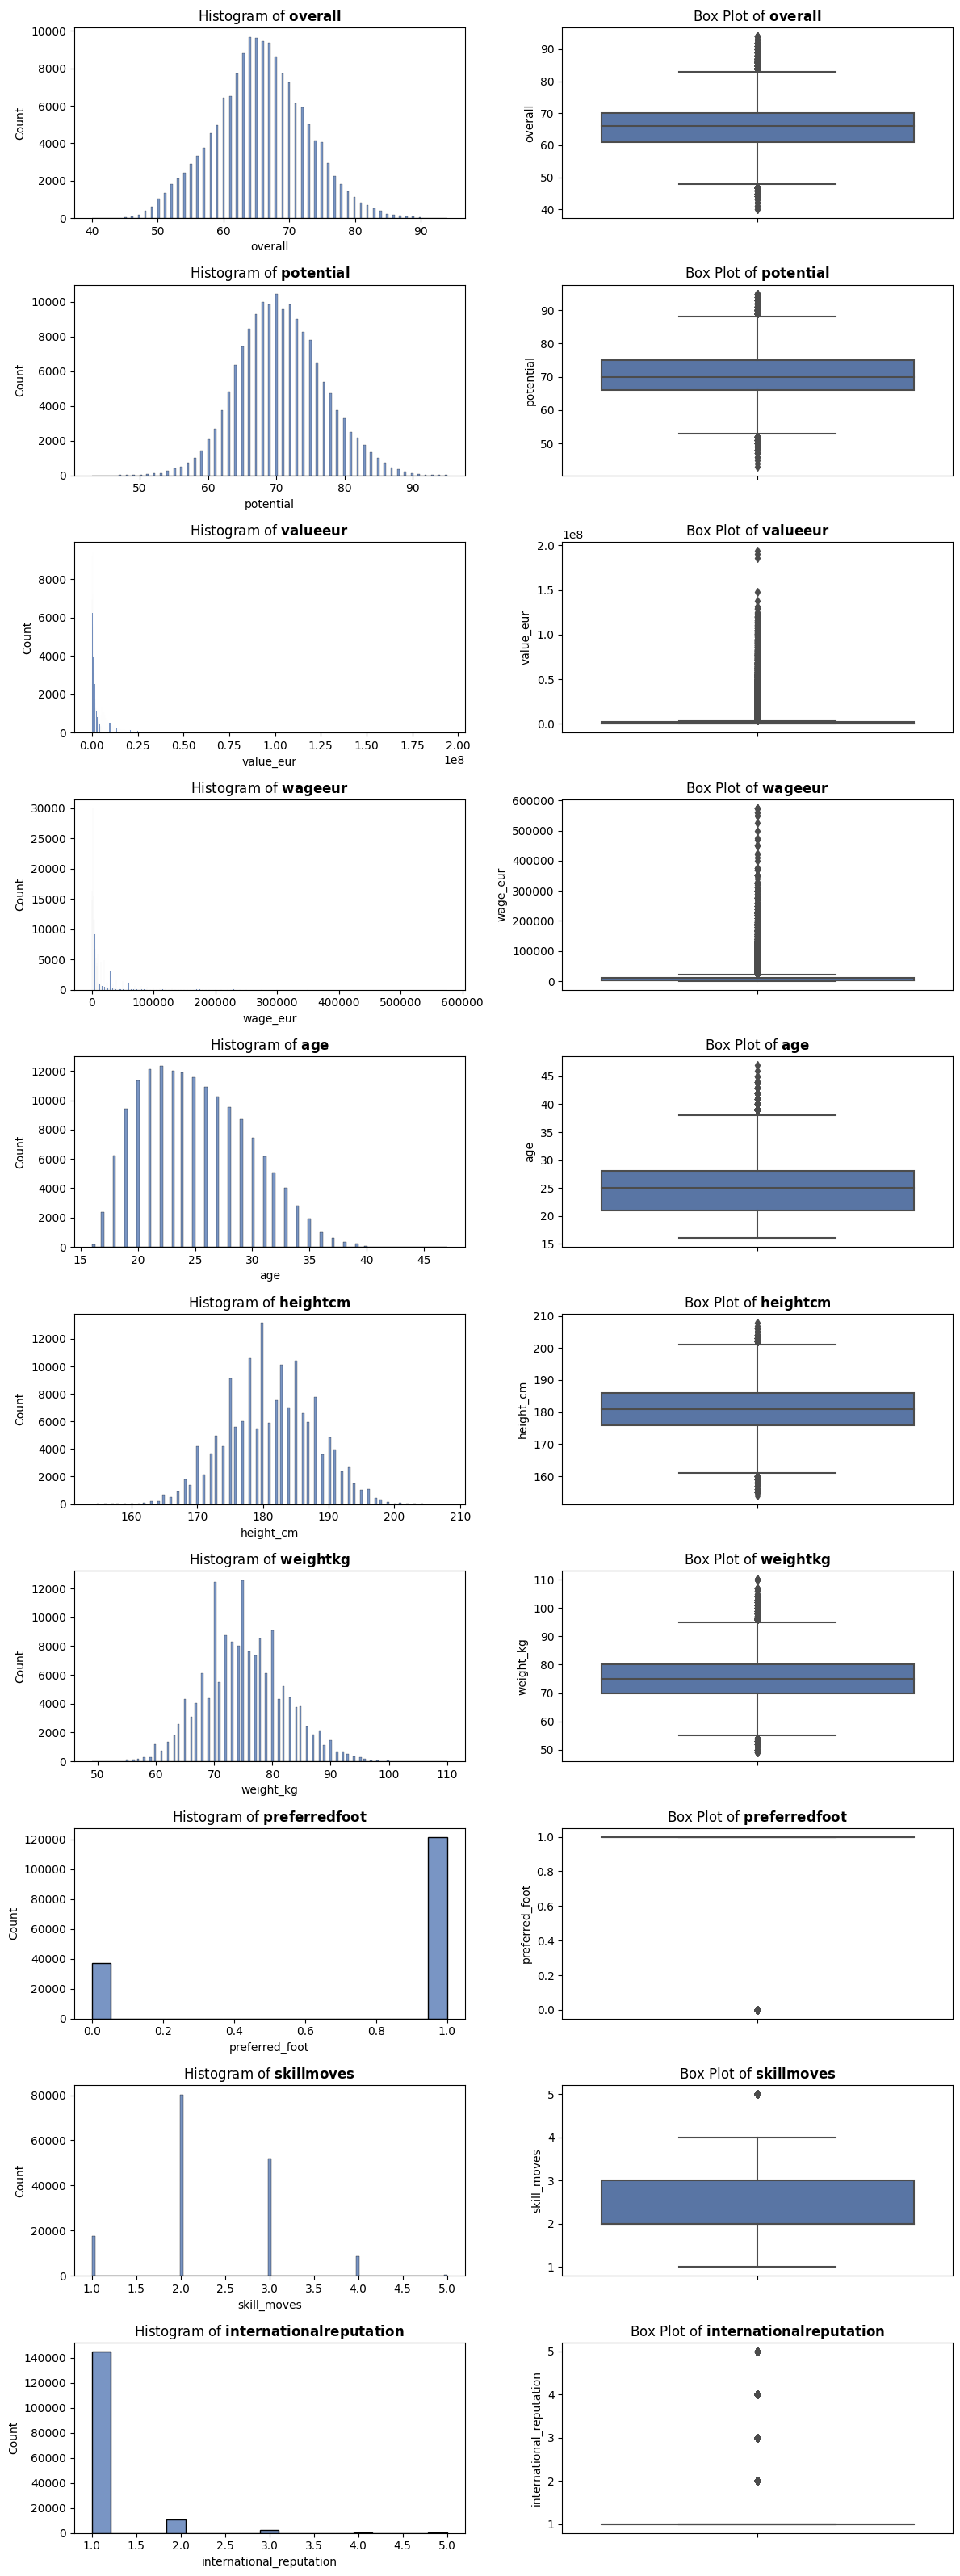

In [136]:
# sns.set_palette('deep')     # Reset the color palette to default

numerical_col = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'skill_moves', 'international_reputation']

fig, axes = plt.subplots(nrows=len(numerical_col), ncols=2, figsize=(12, 32))
fig.subplots_adjust(hspace=0.5)

# distribution of player demographics features
for i, col in enumerate(numerical_col):
    sns.histplot(data=df, x=col, ax=axes[i, 0])
    sns.boxplot(data=df, y=col, ax=axes[i, 1])
    # replace _ in column name with space
    col = col.replace('_', ' ')
    axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
    axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')

plt.tight_layout()
plt.show()

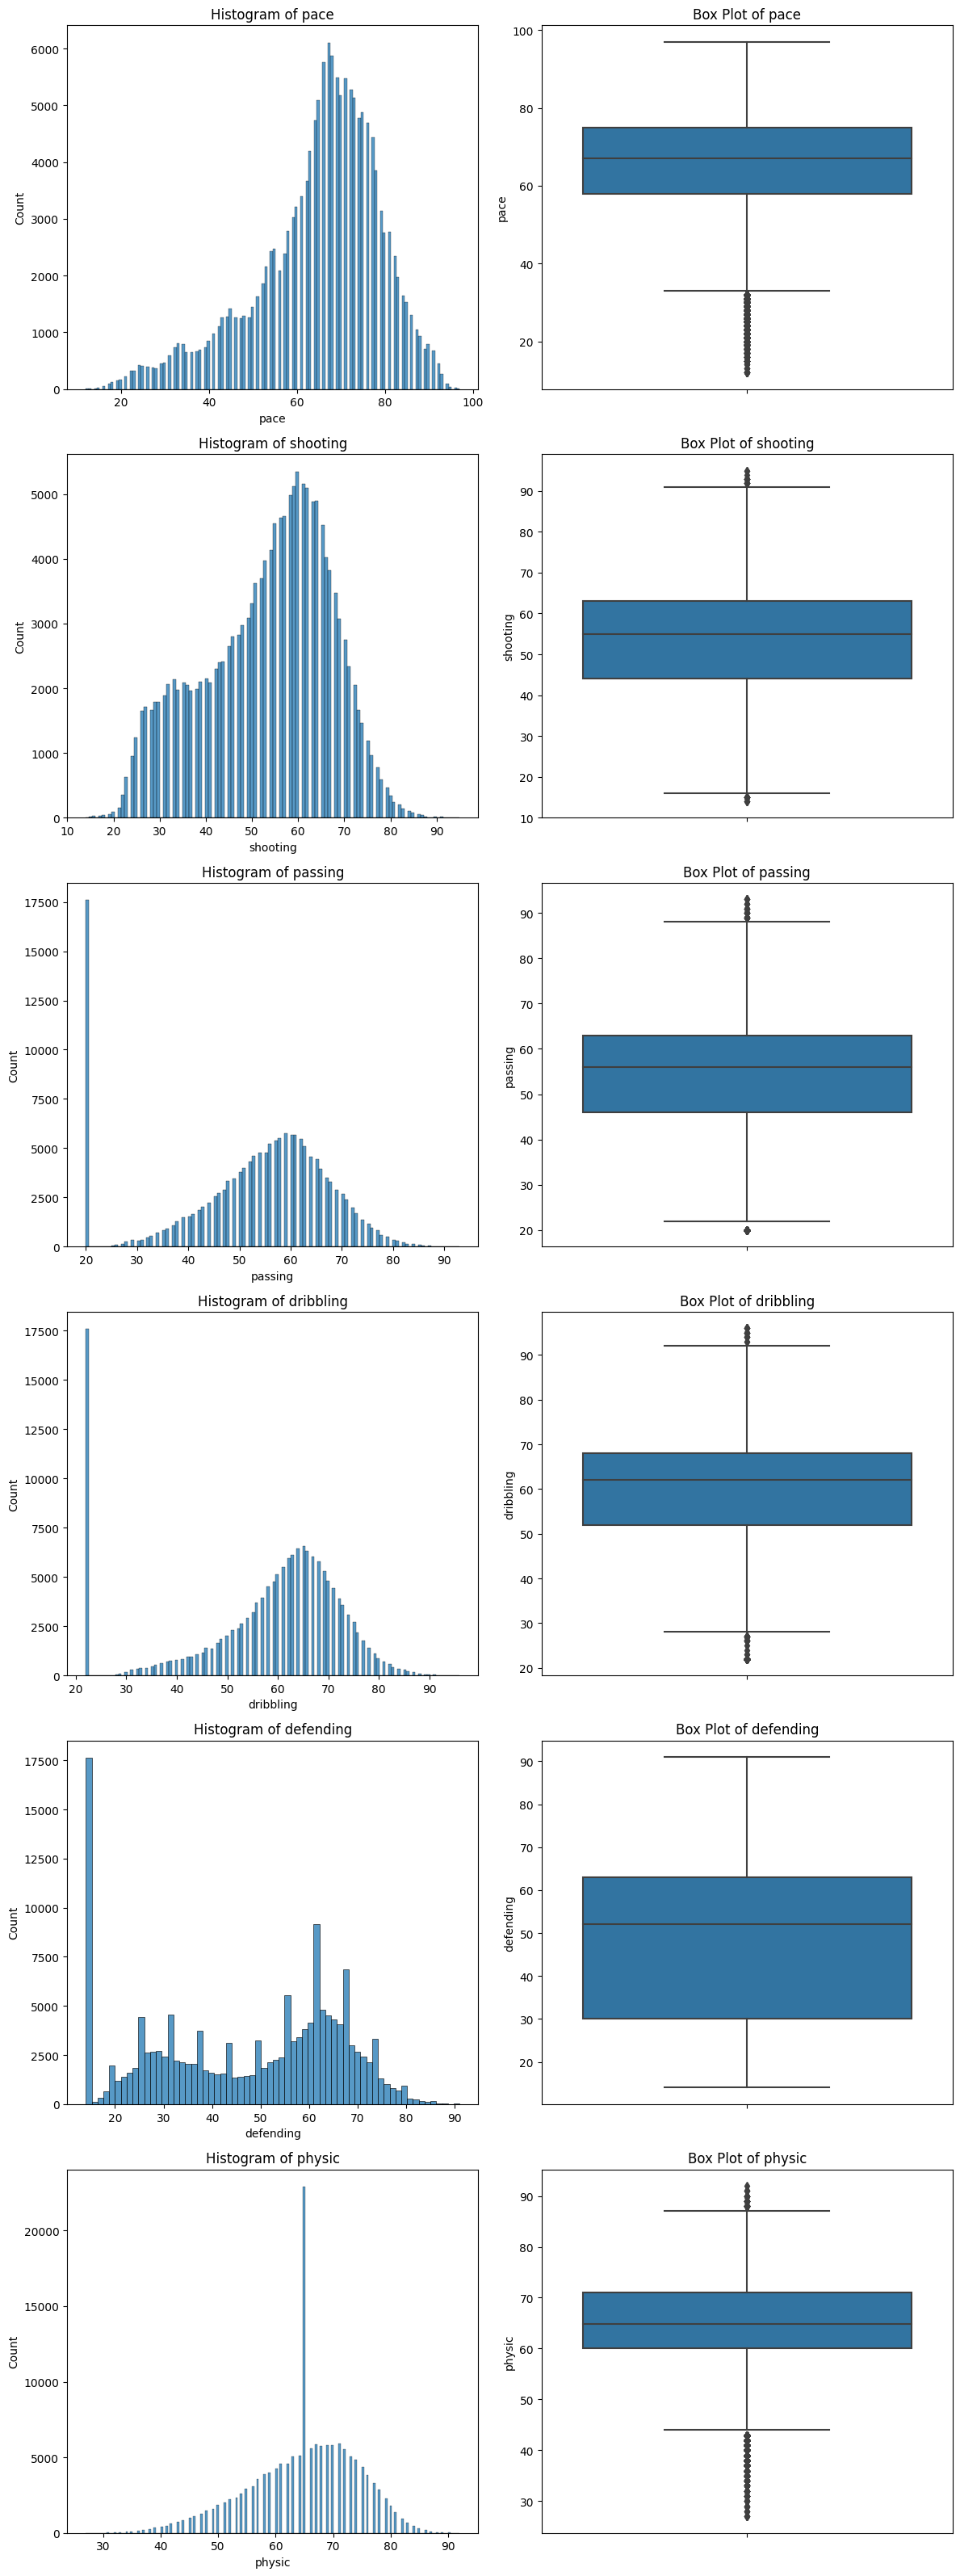

In [68]:
stats = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

fig, axes = plt.subplots(nrows=len(stats), ncols=2, figsize=(12, 32))
fig.subplots_adjust(hspace=0.5)

# distribution of player demographics features
for i, col in enumerate(stats):
    sns.histplot(data=df, x=col, ax=axes[i, 0])
    sns.boxplot(data=df, y=col, ax=axes[i, 1])
    # replace _ in column name with space
    col = col.replace('_', ' ')
    axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
    axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')

plt.tight_layout()
plt.show()

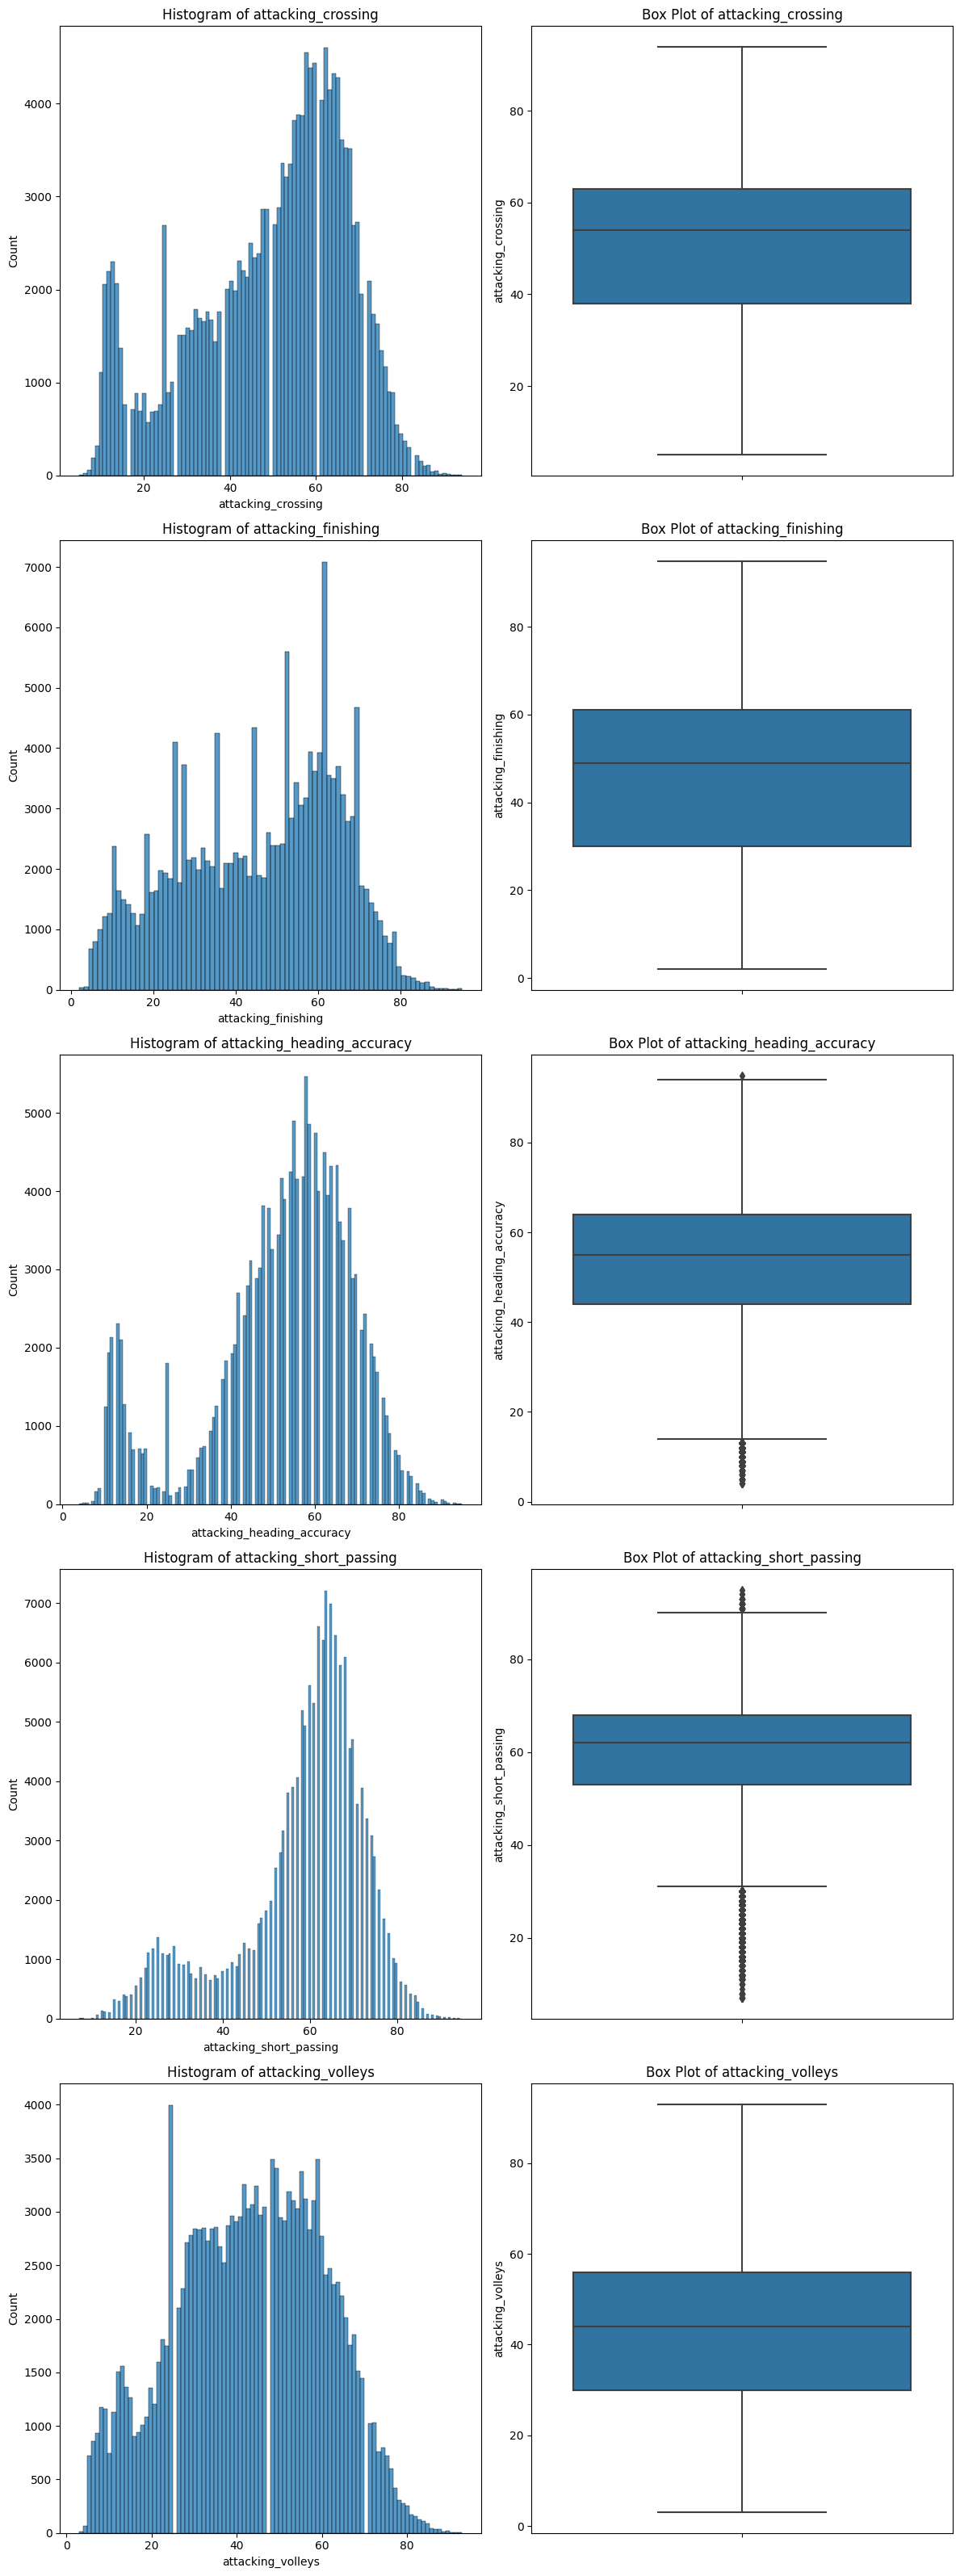

In [69]:
attacking = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys']

fig, axes = plt.subplots(nrows=len(attacking), ncols=2, figsize=(12, 32))
fig.subplots_adjust(hspace=0.5)

# distribution of player demographics features
for i, col in enumerate(attacking):
    sns.histplot(data=df, x=col, ax=axes[i, 0])
    sns.boxplot(data=df, y=col, ax=axes[i, 1])
    # replace _ in column name with space
    col = col.replace('_', ' ')
    axes[i, 0].set_title(r'Histogram of $\bf{' + col + '}$')
    axes[i, 1].set_title(r'Box Plot of $\bf{' + col + '}$')

plt.tight_layout()
plt.show()

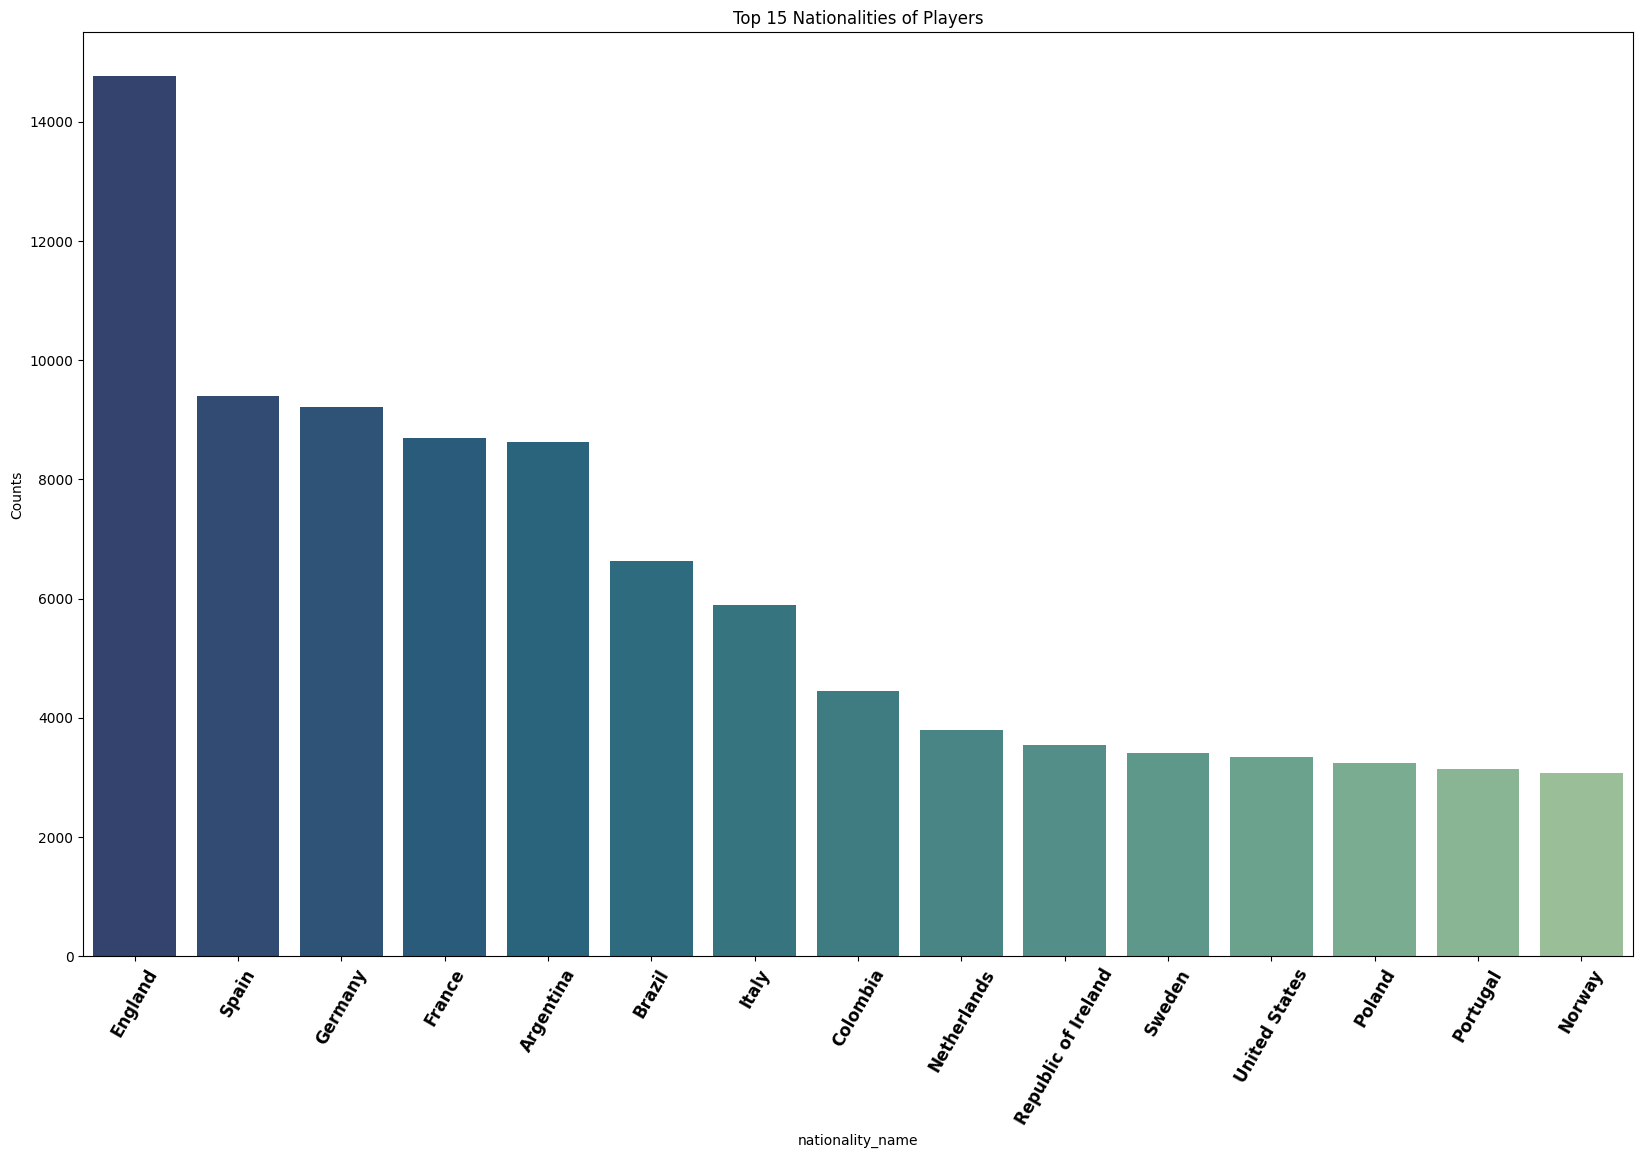

In [123]:
nat_cnt=df.groupby('nationality_name').apply(lambda x:x['short_name'].count()).reset_index(name='Counts')
nat_cnt.sort_values(by='Counts',ascending=False,inplace=True)
top_15_nat_cnt=nat_cnt[:15]
plt.figure(figsize=(20, 12))
sns.barplot(x='nationality_name', y='Counts', data=top_15_nat_cnt, palette='crest_r')
plt.title('Top 15 Nationalities of Players')
plt.xticks(rotation=60, weight = 'bold', fontsize = 12) 
plt.show()

In [117]:
# count unique values in club_name
len(df['club_name'].unique())

1407

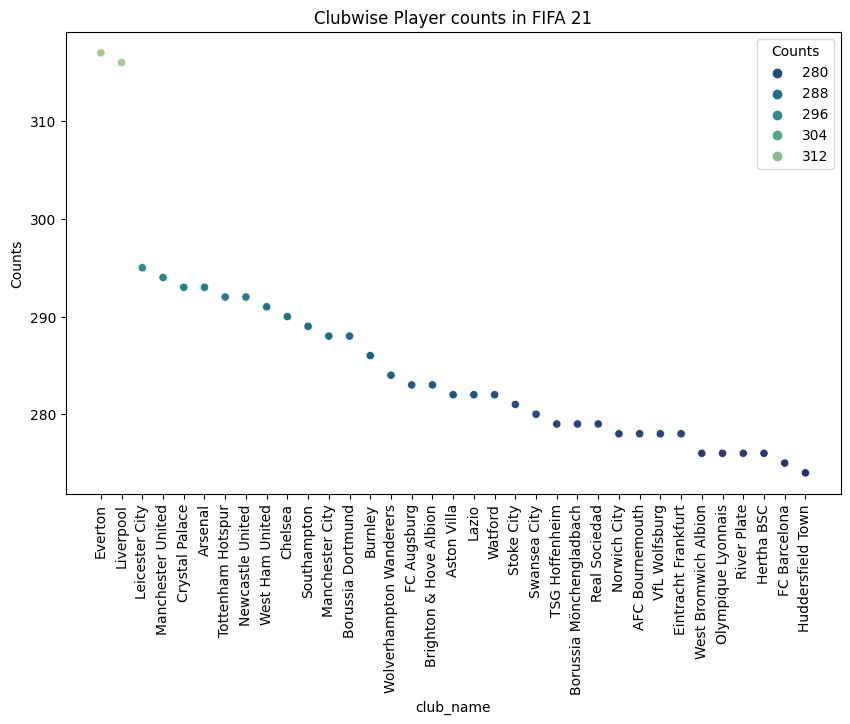

In [129]:
club_count=df.groupby('club_name').apply(lambda x:x['short_name'].count()).reset_index(name='Counts')
club_count.sort_values(by='Counts',ascending=False,inplace=True)
top_15_clubs=club_count[:35]
# fig=px.scatter(top_15_clubs,x='club_name',y='Counts',color='Counts',title='Clubwise Player counts in FIFA 21')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='club_name', y='Counts', data=top_15_clubs, hue='Counts', palette='crest_r')
plt.title('Clubwise Player counts in FIFA 21')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
# fig.show()

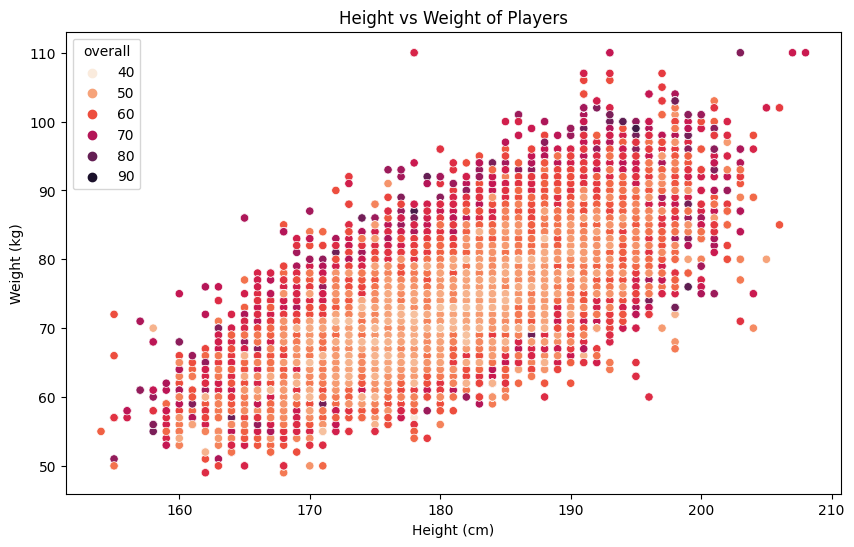

In [141]:
# make a scatter plot of height vs weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height_cm', y='weight_kg', data=df, palette='rocket_r', hue= 'overall')
plt.title('Height vs Weight of Players')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

# We notice that the overall rating is higher for people on the edges of the plot

In [145]:
# # plot overall vs weight divided by height
# df['weight_by_height'] = df['weight_kg'] / df['height_cm']
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='overall', y='weight_by_height', data=df, palette='rocket_r')
# plt.title('Overall Rating vs Weight by Height')
# plt.xlabel('Overall Rating')
# plt.ylabel('Weight by Height')
# plt.show()

# # drop the column
# df = df.drop(columns = ['weight_by_height'])

In [ ]:
# strikers: ls, st, rs, lf, cf, rf
# midfielders:  lam, cam, ram, lm, lcm, cm, rcm, rm, ldm, cdm, rdm
# wingers: lw, rw
# back: lwb, rwb, lb, lcb, cb, rcb, rb
# goalkeepers: gk
strikers = ['ls', 'st', 'rs', 'lf', 'cf', 'rf']
midfielders = ['lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'ldm', 'cdm', 'rdm']
wingers = ['lw', 'rw']
defenders = ['lwb', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
goalkeepers = ['gk']